### Importing the dataset
##### Source - [Dataset](https://www.kaggle.com/competitions/titanic/data)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
titanic = pd.read_csv('titanic.csv', header = 0, dtype={'Age': np.float64})
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [3]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Removing/Replacing Null Values

Getting number of null values in the dataset

In [5]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Ways to handle null values

* Remove rows
* Substitute a specific values, eg. mean
* Interpolate values
* Forward Fill
* Backward Fill
* Impute

__For this dataset, null values in Age column with mean of the column. To achieve this, fill the null value of person who has survived with mean age of the survived people and null value of person who has not survived with mean age of people who have not survived.__

In [6]:
# mean age of people survived 
mean_survived = titanic[titanic.Survived==1].Age.mean()
mean_survived

28.343689655172415

In [7]:
# mean age of people not survived
mean_nsurvived = titanic[titanic.Survived==0].Age.mean()
mean_nsurvived

30.62617924528302

In [8]:
# Create a new column to store new age values 
titanic["Age_new"] = np.where(pd.isnull(titanic.Age) & titanic["Survived"]==1, mean_survived, titanic["Age"])
titanic.Age_new.fillna(mean_nsurvived, inplace=True)

# deleting the old Age column
del titanic["Age"]

# renaming Age_new to Age
titanic.rename(columns = {'Age_new':'Age'}, inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,35.0


__For the null values in embarked column we can directly remove it.__

In [9]:
titanic = titanic[titanic['Embarked'].notna()]
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Age              0
dtype: int64

### Encoding Categorical Data

*Encoding categorical data is process of converting converting categorical data into integer format so that the data with converted categorical values can be provided to the different models*

In [10]:
# creating a function which changes the nominal data, 'male' to numerical data 1 and 'female' to 2
def getNumber(gender):
    if gender=="male":
        return 1
    else :
        return 2

titanic["Gender"] = titanic["Sex"].apply(getNumber)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,22.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,38.0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,35.0,2
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,35.0,1


In [11]:
del titanic["Sex"]
titanic.rename(columns={'Gender':'Sex'}, inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Name,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age,Sex
0,1,0,3,"Braund, Mr. Owen Harris",1,0,A/5 21171,7.2500,NaN,S,22.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,71.2833,C85,C,38.0,2
2,3,1,3,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,53.1000,C123,S,35.0,2
4,5,0,3,"Allen, Mr. William Henry",0,0,373450,8.0500,NaN,S,35.0,1


### Nomalization

*min-max normalization will be performed on fare column*

In [12]:
old_min = titanic["Fare"].min()
old_max = (titanic["Fare"]).max()

print(old_min)
print(old_max)

0.0
512.3292


In [13]:
new_min = 0
new_max = 50

def fare_norm(value):
    return (((value-old_min)*(new_max-new_min))/(old_max-old_min))+new_min

titanic["Fare_norm"] = titanic["Fare"].apply(fare_norm)
titanic.head()

,PassengerId,Survived,Pclass,Name,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age,Sex,Fare_norm
0,1,0,3,"Braund, Mr. Owen Harris",1,0,A/5 21171,7.2500,NaN,S,22.0,1,0.707553
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,71.2833,C85,C,38.0,2,6.956787
2,3,1,3,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,2,0.773428
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,53.1000,C123,S,35.0,2,5.182215
4,5,0,3,"Allen, Mr. William Henry",0,0,373450,8.0500,NaN,S,35.0,1,0.785628


In [14]:
del titanic["Fare"]
titanic.rename(columns={'Fare_norm':'Fare'}, inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Name,SibSp,Parch,Ticket,Cabin,Embarked,Age,Sex,Fare
0,1,0,3,"Braund, Mr. Owen Harris",1,0,A/5 21171,NaN,S,22.0,1,0.707553
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,C85,C,38.0,2,6.956787
2,3,1,3,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,NaN,S,26.0,2,0.773428
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,C123,S,35.0,2,5.182215
4,5,0,3,"Allen, Mr. William Henry",0,0,373450,NaN,S,35.0,1,0.785628


### Removing Outliers

Removing outliers in age column

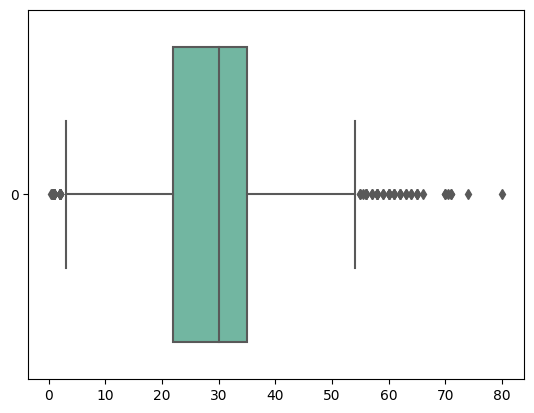

In [15]:
# identifying outlier using boxplot
ax = sns.boxplot(data=titanic["Age"], orient="h", palette="Set2")

In [16]:
# removing outliers using Tukey's boxplot method (IQR method)
q1 = titanic["Age"].quantile(0.25)
q3 = titanic["Age"].quantile(0.75)
iqr = q3 - q1

# fence_constant = iqr*1.5
# inner_fence = q3 + fence_constant
# outer_fence = q1 - fence_constant

inner_fence = 1.5*iqr
outer_fence = 3*iqr

print(inner_fence)
print(outer_fence)
# print(fence_constant*1.5)

19.5
39.0


In [17]:
# function to change outliers to null

def outlier_idf(value):
      if value > outer_fence:
          return np.nan
      elif value < inner_fence:
          return np.nan
      else:
          return value


titanic["Age_"] = titanic["Age"].apply(outlier_idf)
titanic = titanic[titanic["Age_"].notna()]
del titanic["Age_"]

titanic

,PassengerId,Survived,Pclass,Name,SibSp,Parch,Ticket,Cabin,Embarked,Age,Sex,Fare
0,1,0,3,"Braund, Mr. Owen Harris",1,0,A/5 21171,NaN,S,22.000000,1,0.707553
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,C85,C,38.000000,2,6.956787
2,3,1,3,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,NaN,S,26.000000,2,0.773428
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,C123,S,35.000000,2,5.182215
4,5,0,3,"Allen, Mr. William Henry",0,0,373450,NaN,S,35.000000,1,0.785628
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",0,5,382652,NaN,Q,39.000000,2,2.842411
886,887,0,2,"Montvila, Rev. Juozas",0,0,211536,NaN,S,27.000000,1,1.268716
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,2,W./C. 6607,NaN,S,30.626179,2,2.288568
889,890,1,1,"Behr, Mr. Karl Howell",0,0,111369,C148,C,26.000000,1,2.927805


### Exploratory Data Analysis

In [18]:
titanic.head()

,PassengerId,Survived,Pclass,Name,SibSp,Parch,Ticket,Cabin,Embarked,Age,Sex,Fare
0,1,0,3,"Braund, Mr. Owen Harris",1,0,A/5 21171,NaN,S,22.0,1,0.707553
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,C85,C,38.0,2,6.956787
2,3,1,3,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,NaN,S,26.0,2,0.773428
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,C123,S,35.0,2,5.182215
4,5,0,3,"Allen, Mr. William Henry",0,0,373450,NaN,S,35.0,1,0.785628


In [19]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,SibSp,Parch,Ticket,Cabin,Embarked,Age,Sex,Fare
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",0,5,382652,NaN,Q,39.000000,2,2.842411
886,887,0,2,"Montvila, Rev. Juozas",0,0,211536,NaN,S,27.000000,1,1.268716
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,2,W./C. 6607,NaN,S,30.626179,2,2.288568
889,890,1,1,"Behr, Mr. Karl Howell",0,0,111369,C148,C,26.000000,1,2.927805
890,891,0,3,"Dooley, Mr. Patrick",0,0,370376,NaN,Q,32.000000,1,0.756350


In [20]:
titanic.shape

(563, 12)

In [21]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 563 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  563 non-null    int64  
 1   Survived     563 non-null    int64  
 2   Pclass       563 non-null    int64  
 3   Name         563 non-null    object 
 4   SibSp        563 non-null    int64  
 5   Parch        563 non-null    int64  
 6   Ticket       563 non-null    object 
 7   Cabin        104 non-null    object 
 8   Embarked     563 non-null    object 
 9   Age          563 non-null    float64
 10  Sex          563 non-null    int64  
 11  Fare         563 non-null    float64
dtypes: float64(2), int64(6), object(4)
memory usage: 57.2+ KB


In [22]:
titanic.describe()

,PassengerId,Survived,Pclass,SibSp,Parch,Age,Sex,Fare
count,563.000000,563.000000,563.000000,563.000000,563.00000,563.000000,563.000000,563.000000
mean,446.262877,0.357016,2.399645,0.408526,0.25222,28.995816,1.326821,2.875184
std,254.511992,0.479546,0.801555,1.038442,0.70608,4.576883,0.469468,5.093326
min,1.000000,0.000000,1.000000,0.000000,0.00000,20.000000,1.000000,0.000000
25%,233.500000,0.000000,2.000000,0.000000,0.00000,26.000000,1.000000,0.770174
50%,444.000000,0.000000,3.000000,0.000000,0.00000,30.000000,1.000000,1.217479
75%,657.500000,1.000000,3.000000,1.000000,0.00000,30.626179,2.000000,2.570369
max,891.000000,1.000000,3.000000,8.000000,5.00000,39.000000,2.000000,50.000000


In [23]:
titanic.nunique()

PassengerId    563
Survived         2
Pclass           3
Name           563
SibSp            5
Parch            6
Ticket         496
Cabin           84
Embarked         3
Age             30
Sex              2
Fare           193
dtype: int64

C:\Users\Soham Patil\AppData\Local\Temp\ipykernel_19236\3067958798.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = titanic.corr()
C:\Users\Soham Patil\AppData\Local\Temp\ipykernel_19236\3067958798.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(titanic.corr())


<AxesSubplot: >

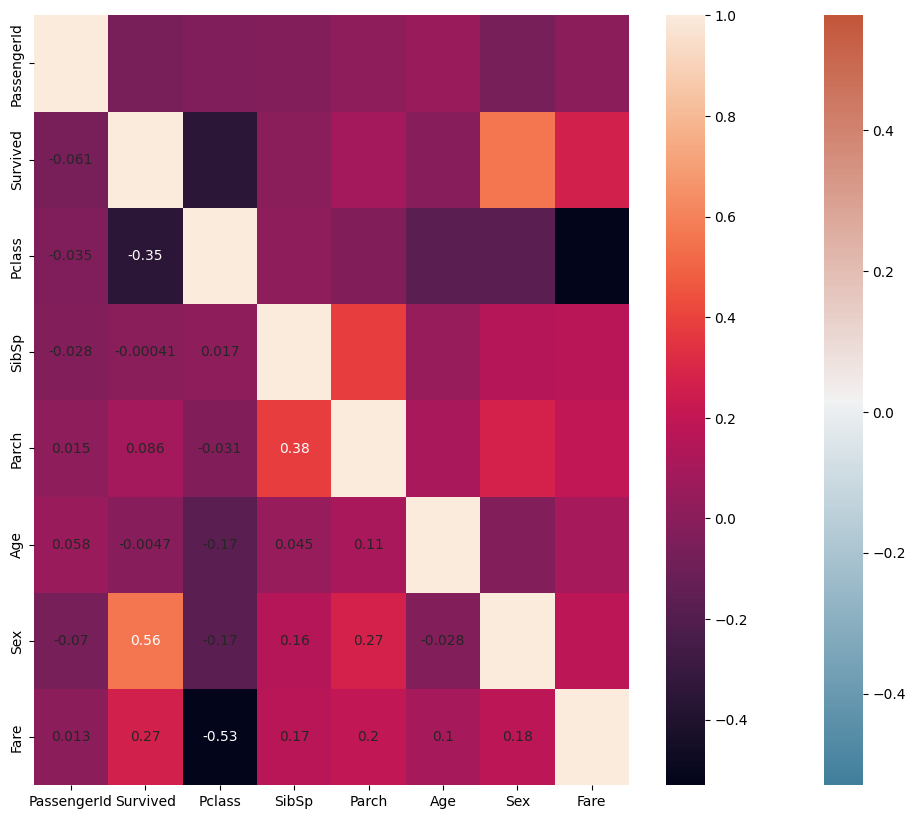

In [30]:
corr = titanic.corr()
f, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap)
# plt.show()
sns.heatmap(titanic.corr())

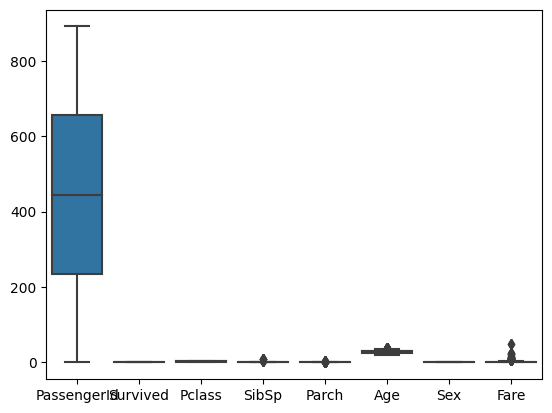

In [25]:
sns.boxplot(data=titanic)
plt.show()

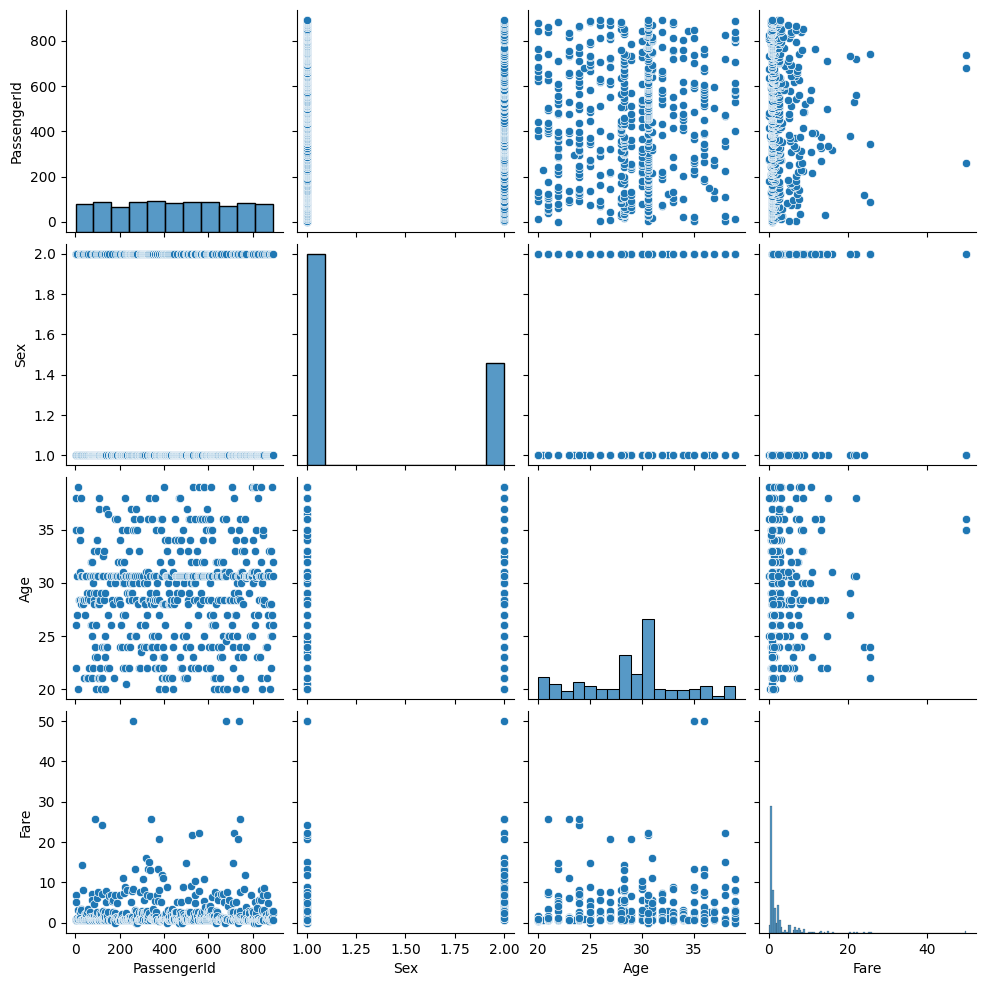

In [26]:
sns.pairplot(titanic[["PassengerId", "Sex", "Age", "Fare"]])
plt.show()

C:\Users\Soham Patil\AppData\Local\Temp\ipykernel_19236\2881774494.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=titanic['Fare'], shade=True)
C:\Users\Soham Patil\AppData\Local\Temp\ipykernel_19236\2881774494.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=titanic['Age'], shade=True)


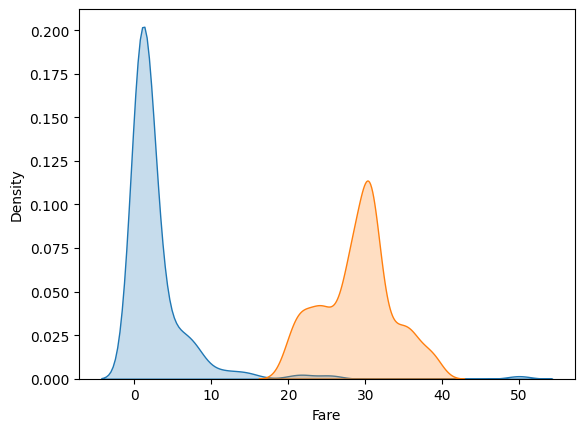

In [27]:
sns.kdeplot(x=titanic['Fare'], shade=True)
sns.kdeplot(x=titanic['Age'], shade=True)
plt.show()

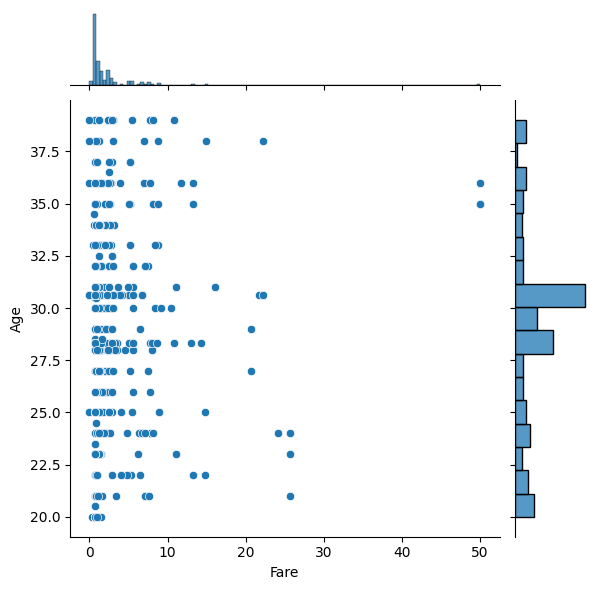

In [28]:
sns.jointplot(x=titanic["Fare"], y=titanic["Age"])#, kind="hex")
plt.show()

In [29]:
print(f"Kurtosis : {titanic['Age'].kurt()}")
print(f"Skewness : {titanic['Age'].skew()}")

Kurtosis : -0.39106688975925374
Skewness : -0.03433546870204224
